In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

數據分析內容：

數據探索 - 了解數據的結構，分佈

Feature engneering 特徵工程
1. 數據清理 - 錯誤的糾正，缺失值
2. 數據轉換
3. Feature Selection 特徵選擇


In [2]:
house=pd.read_csv('housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house.shape

(20640, 10)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
house['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

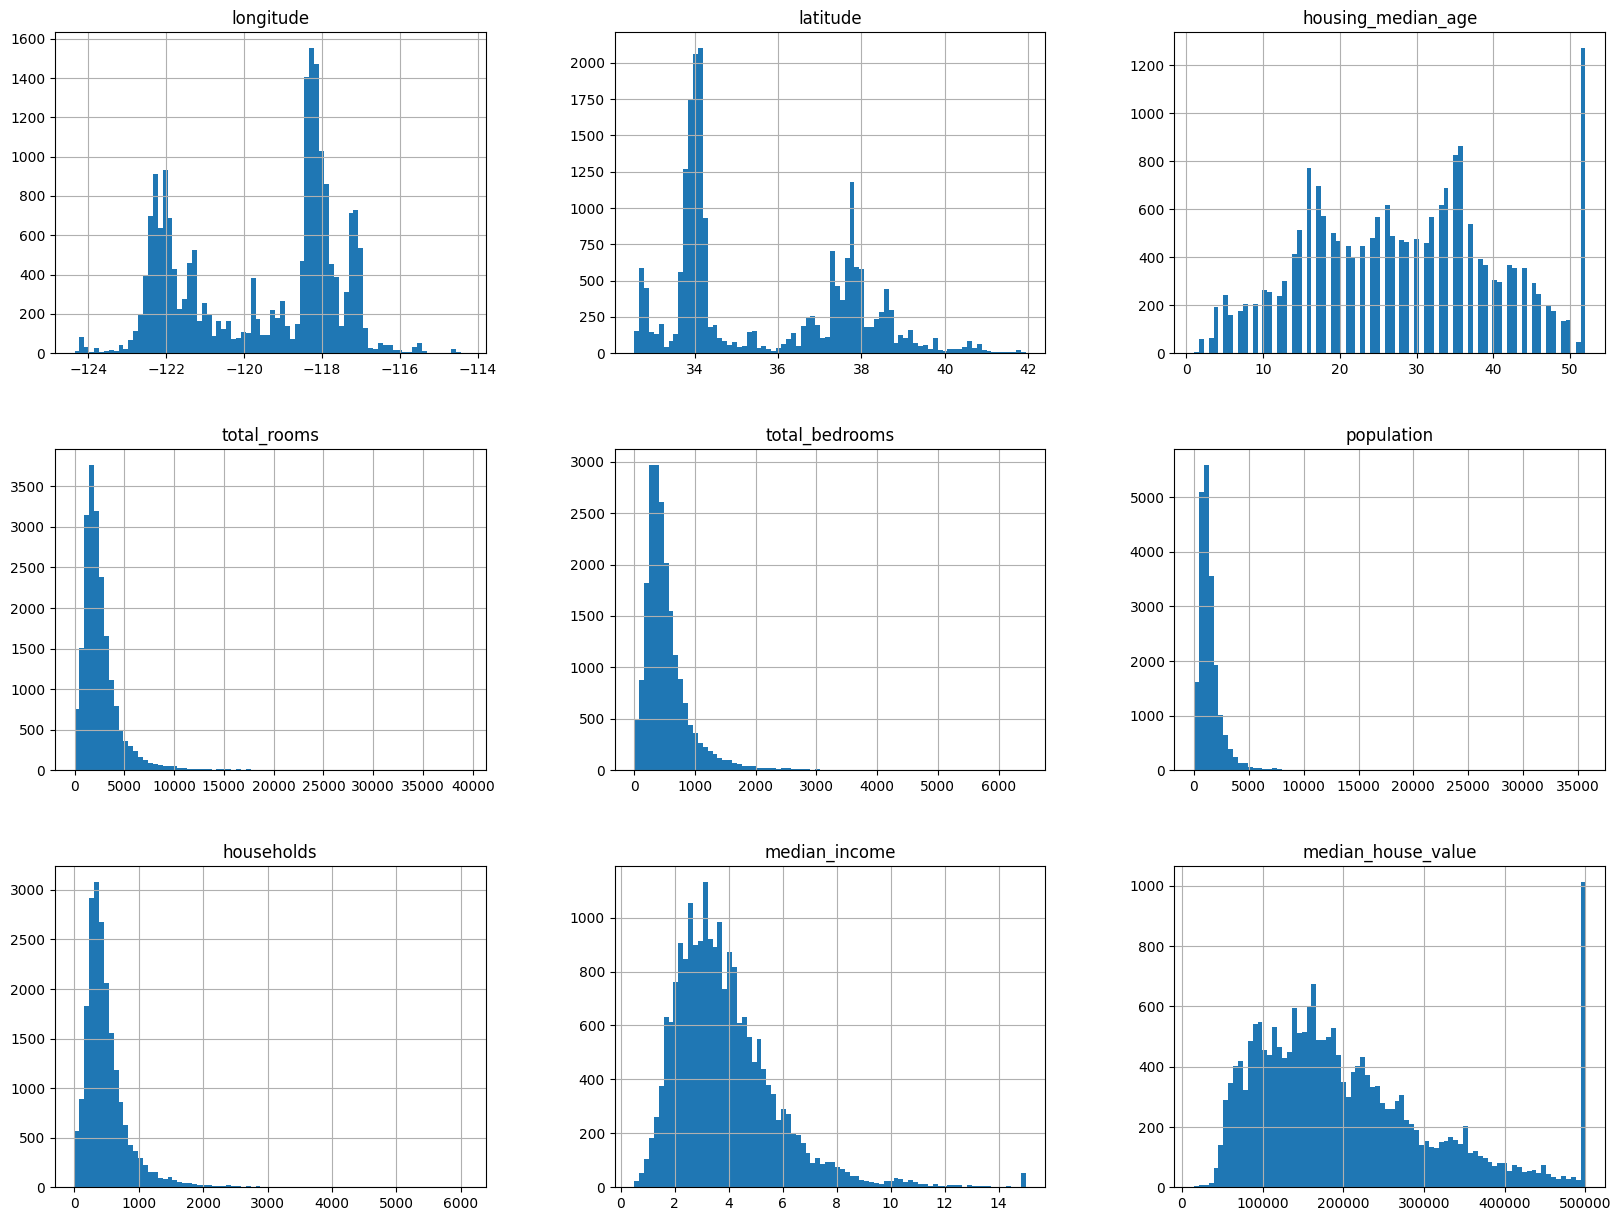

In [6]:
house.hist(bins=80, figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

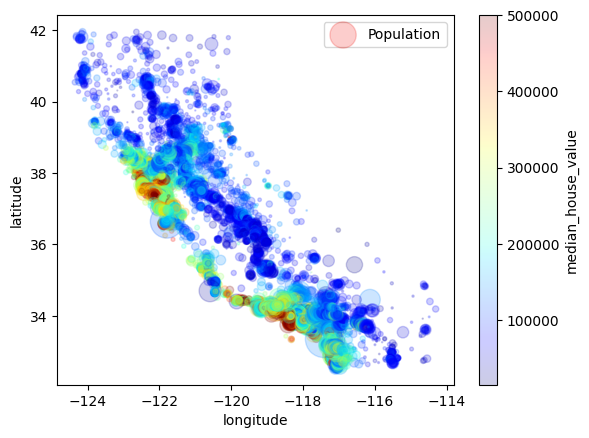

In [7]:
house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2,
           s=house['population']/50, label='Population',
           c='median_house_value', cmap=plt.get_cmap('jet'))

In [8]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
house.iloc[:, :-1].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [10]:
corr_matrix = house.iloc[:, :-1].corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [11]:
house_no_na = house.dropna(subset=['total_bedrooms'])
house_no_na.shape

(20433, 10)

In [12]:
dummies = pd.get_dummies(house_no_na.ocean_proximity, dtype='int')
dummies.tail()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0
20639,0,1,0,0,0


In [13]:
house_merged = pd.concat([house_no_na, dummies], axis='columns')
house_merged.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [14]:
house_final = house_merged.drop(['ocean_proximity', 'ISLAND'], axis='columns')
house_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


1. Model Training
2. Scoring/Evaluation

In [18]:
X = house_final.drop(columns=['median_house_value'])
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [19]:
y = house_final['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=32)

In [25]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
6847,-118.14,34.07,42.0,1036.0,199.0,656.0,215.0,4.1902,1,0,0,0
17996,-121.98,37.29,31.0,2750.0,664.0,1459.0,660.0,3.2287,1,0,0,0
8746,-118.34,33.80,25.0,4177.0,832.0,2123.0,789.0,5.0814,1,0,0,0
6088,-117.86,34.10,23.0,2535.0,490.0,1327.0,466.0,3.5977,1,0,0,0
4617,-118.30,34.07,26.0,2107.0,757.0,2660.0,740.0,2.3375,1,0,0,0


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
X_train

array([[ 0.7196167 , -0.73706394,  1.05921796, ..., -0.68293742,
        -0.35352906, -0.38015467],
       [-1.19455342,  0.76601049,  0.18576925, ..., -0.68293742,
        -0.35352906, -0.38015467],
       [ 0.61992034, -0.86309813, -0.29065732, ..., -0.68293742,
        -0.35352906, -0.38015467],
       ...,
       [-0.42190663,  0.79401809, -1.0847016 , ...,  1.46426301,
        -0.35352906, -0.38015467],
       [-1.12476597,  0.44392311,  0.10636482, ..., -0.68293742,
        -0.35352906, -0.38015467],
       [ 0.86417642, -0.86309813,  0.42398253, ..., -0.68293742,
        -0.35352906, -0.38015467]])

In [29]:
from sklearn.ensemble import RandomForestRegressor

rfReg = RandomForestRegressor()
rfReg.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
y_pred = rfReg.predict(X_test)
y_pred

array([213996.  ,  61595.  , 232724.  , ..., 250831.03, 182032.  ,
       112867.  ])

In [31]:
performance = pd.DataFrame({ 'PRED': y_pred, 'ACTUAL': y_test})
performance['ERROR'] = performance['ACTUAL'] - performance['PRED']
performance.head()

,PRED,ACTUAL,ERROR
13084,213996.00,129500.0,-84496.00
2095,61595.00,53400.0,-8195.00
9329,232724.00,187500.0,-45224.00
9148,335346.11,187500.0,-147846.11
4796,216028.00,123300.0,-92728.00


In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred) #均方誤差
print(np.sqrt(mse)) #RMSE 均方根誤差

63208.721122470044


In [37]:
performance.reset_index(drop=True, inplace=True)
performance.reset_index(inplace=True)
performance.head()

,index,PRED,ACTUAL,ERROR
0,0,213996.00,129500.0,-84496.00
1,1,61595.00,53400.0,-8195.00
2,2,232724.00,187500.0,-45224.00
3,3,335346.11,187500.0,-147846.11
4,4,216028.00,123300.0,-92728.00


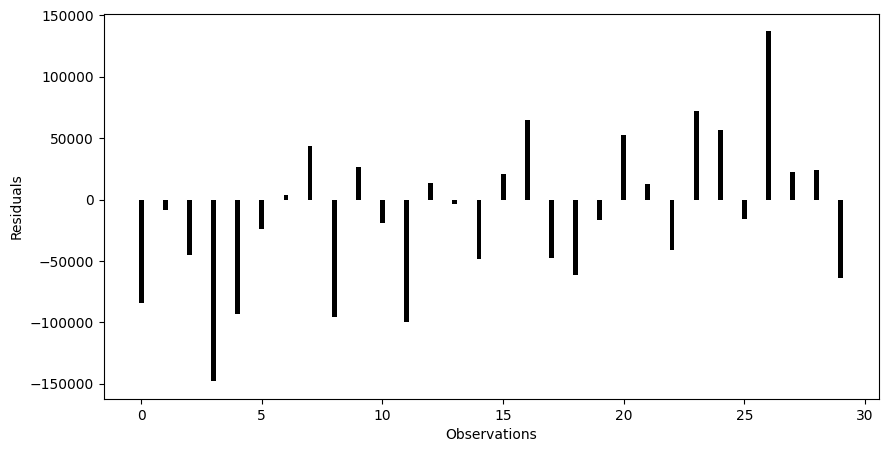

In [40]:
fig = plt.figure(figsize=(10,5))
plt.bar('index', 'ERROR', data=performance[:30], color='black', width=0.2)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()

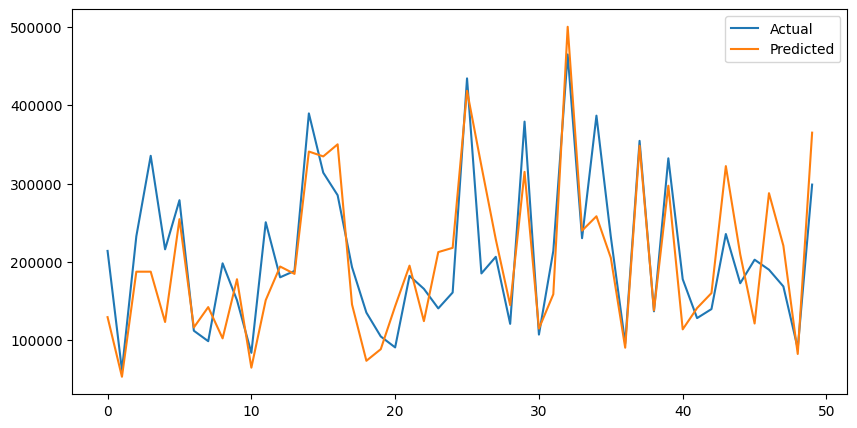

In [44]:
test = performance.drop(['index', 'ERROR'], axis='columns')
fig=plt.figure(figsize=(10,5))
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])

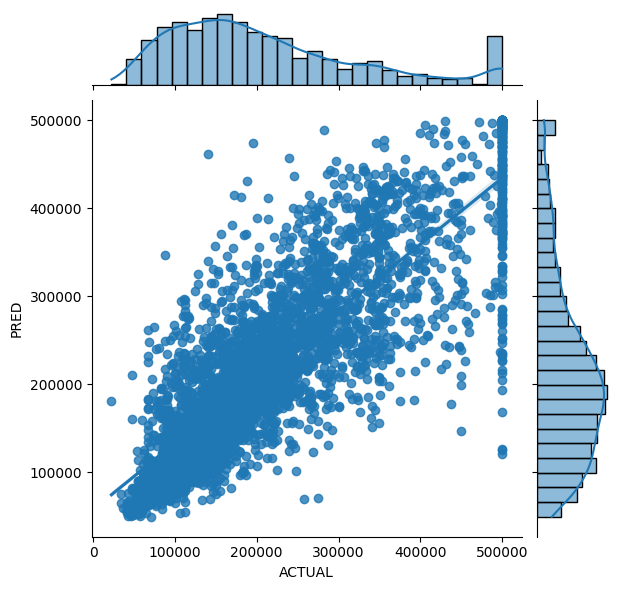

In [45]:
import seaborn as sns

sns.jointplot(x='ACTUAL', y='PRED', data=test, kind='reg')